<a href="https://colab.research.google.com/github/ThomasPineda/Ajuste_distribuciones/blob/main/Trabajo_Sistemas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importe de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from google.colab import files

In [2]:
#conectar el colab con mi drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#Carga de datos (Estan en mi drive)
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Simulación de sistemas/Trabajo simulación /dat7.csv")

In [4]:
#columnas del dataframe
df.columns

Index(['Unnamed: 0', 'D3', 'D2'], dtype='object')

In [6]:
#Contar cuantos negativos existen
d = 0
for i in range(len(df['D2'])):
  if df['D2'][i] <= 0:
    d = d + 1
print(d)


3


In [7]:
df['D2'] = df['D2'].apply(lambda x : x/60)

In [ ]:
len(df)

43410

In [8]:
df

,Unnamed: 0,D3,D2
0,1,2,75.300000
1,2,1,65.883333
2,3,2,38.400000
3,4,1,88.900000
4,5,1,60.400000
...,...,...,...
43409,43410,1,71.233333
43410,43411,1,45.383333
43411,43412,3,54.933333
43412,43413,1,62.883333


In [9]:
#ver data frame
df = df.set_index('Unnamed: 0')
df

,D3,D2
Unnamed: 0,,
1,2,75.300000
2,1,65.883333
3,2,38.400000
4,1,88.900000
5,1,60.400000
...,...,...
43410,1,71.233333
43411,1,45.383333
43412,3,54.933333


In [10]:
#ver que valores tiene la columna D3 del dataframe
df['D3'].value_counts(0)

1    30174
2    12717
3      522
5        1
Name: D3, dtype: int64

In [11]:
#Limpiar el dataframe
indexNames = df[(df['D3'] == 5)].index
df.drop(indexNames , inplace=True)

In [12]:
indexNames = df[ df['D2'] <= 0].index
df.drop(indexNames , inplace=True)

In [15]:
#Descargar dataset limpio
df.to_excel('DAT.xlsx')
files.download("DAT.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
#distribucion de las prioridades
df['D3'].value_counts(1)

1    0.695024
2    0.292951
3    0.012025
Name: D3, dtype: float64

Text(0.5, 1.0, 'Histograma de prioridades para servicios de ambulancia')

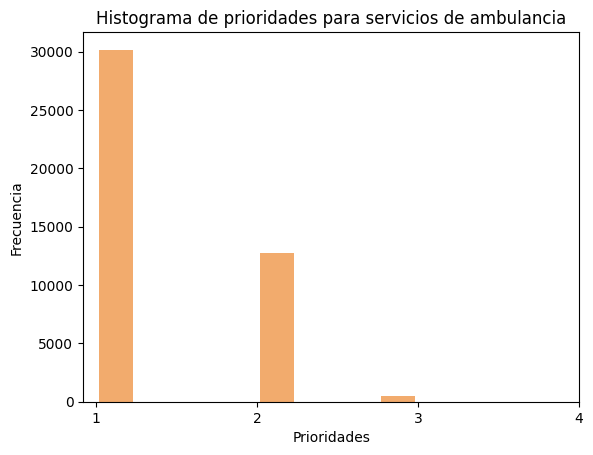

In [16]:
#histograma
intervalos = range(min(df['D3']), max(df['D3']) + 2)
df['D3'].plot.hist(bins=8, color='#F2AB6D', rwidth=0.85) # generamos el histograma a partir de los datos
plt.xticks(intervalos)
plt.ylabel('Frecuencia')
plt.xlabel('Prioridades')
plt.title('Histograma de prioridades para servicios de ambulancia')


In [17]:
df

,D3,D2
Unnamed: 0,,
1,2,75.300000
2,1,65.883333
3,2,38.400000
4,1,88.900000
5,1,60.400000
...,...,...
43410,1,71.233333
43411,1,45.383333
43412,3,54.933333


In [18]:
#Estadisticas descriptivas de todo el dataframe
df['D2'].describe()

count    43410.000000
mean        59.247963
std         41.301099
min          0.050000
25%         40.850000
50%         59.266667
75%         74.350000
max       1192.000000
Name: D2, dtype: float64

Text(0, 0.5, 'Duración')

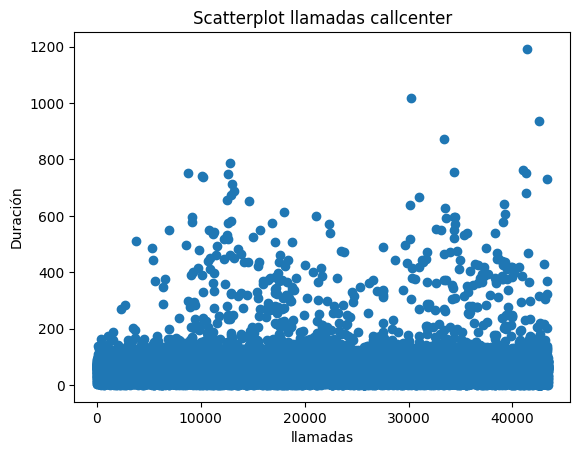

In [19]:

plt.scatter(df.index, df['D2'])
plt.title("Scatterplot llamadas callcenter")
plt.xlabel("llamadas")
plt.ylabel("Duración")

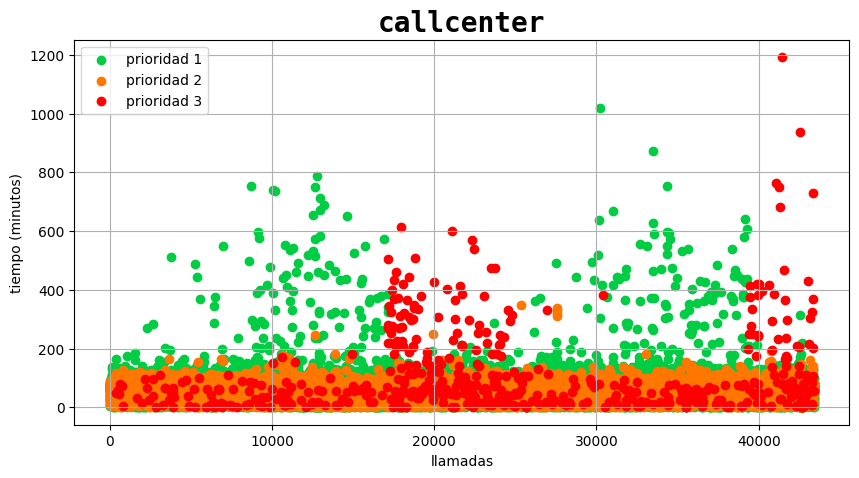

In [22]:
df1 = df[df['D3']==1]['D2']
df2 = df[df['D3']==2]['D2']
df3 = df[df['D3']==3]['D2']

#Scatterplot
colores = ["#00cc44",  # Verde
           "#ff7700",  # Naranja
           "#ff0000"   # Rojo
          ]

plt.figure(figsize=(10,5))
plt.scatter(df1.index, df1, c="#00cc44",label="prioridad 1")
plt.scatter(df2.index, df2, c="#ff7700",label="prioridad 2")
plt.scatter(df3.index, df3, c="#ff0000",label="prioridad 3")

plt.title("callcenter", fontdict={'family': 'monospace', 'weight': 'bold','size': 20})
plt.legend(loc='upper left')
plt.xlabel("llamadas", size=10)
plt.ylabel("tiempo (minutos)")
plt.grid()
plt.show()

In [23]:
df2.index

Int64Index([    1,     3,     6,    14,    20,    24,    26,    27,    30,
               35,
            ...
            43364, 43368, 43370, 43371, 43373, 43378, 43381, 43386, 43400,
            43402],
           dtype='int64', name='Unnamed: 0', length=12717)

In [24]:
df1.describe()

count    30171.000000
mean        61.095526
std         41.736124
min          0.050000
25%         43.650000
50%         61.416667
75%         76.383333
max       1018.516667
Name: D2, dtype: float64

In [25]:
df2.describe()

count    12717.000000
mean        52.587742
std         25.347117
min          0.100000
25%         36.500000
50%         54.050000
75%         68.450000
max        347.500000
Name: D2, dtype: float64

In [ ]:
3155/60

52.583333333333336

In [26]:
df3.describe()

count     522.000000
mean      114.717720
std       145.634030
min         0.100000
25%        23.320833
50%        60.225000
75%       143.987500
max      1192.000000
Name: D2, dtype: float64

In [27]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style

# Ajuste de distribuciones
# ==============================================================================
from scipy import stats
import inspect
from statsmodels.distributions.empirical_distribution import ECDF
import tqdm
import inspect
import warnings

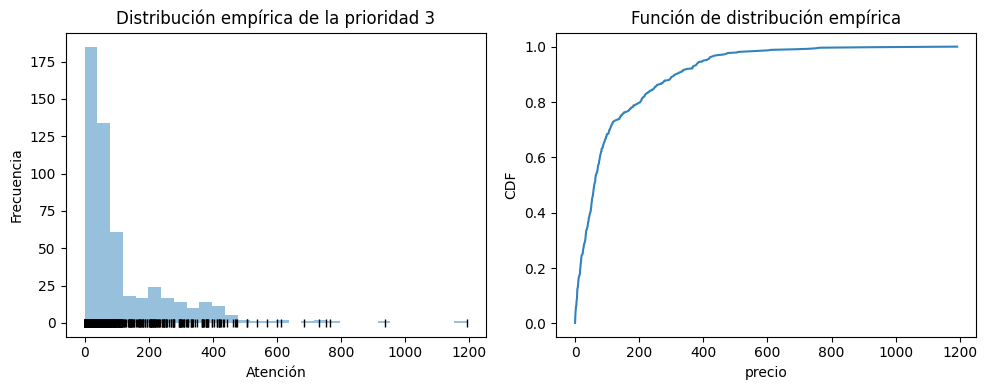

In [28]:
# Gráficos distribución observada (empírica)
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Histograma
axs[0].hist(x=df3, bins=30, color="#3182bd", alpha=0.5)
axs[0].plot(df3, np.full_like(df3, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución empírica de la prioridad 3')
axs[0].set_xlabel('Atención')
axs[0].set_ylabel('Frecuencia')

# Función de Distribución Acumulada
# ecdf (empirical cumulative distribution function)
ecdf = ECDF(x=df3)
axs[1].plot(ecdf.x, ecdf.y, color="#3182bd")
axs[1].set_title('Función de distribución empírica')
axs[1].set_xlabel('precio')
axs[1].set_ylabel('CDF')

plt.tight_layout();

In [29]:

warnings.filterwarnings('ignore')

def seleccionar_distribuciones(familia='realall', verbose=True):
    '''
    Esta función selecciona un subconjunto de las distribuciones disponibles
    en scipy.stats

    Parameters
    ----------
    familia : {'realall', 'realline', 'realplus', 'real0to1', 'discreta'}
        realall: distribuciones de la familia `realline` + `realplus`
        realline: distribuciones continuas en el dominio (-inf, +inf)
        realplus: distribuciones continuas en el dominio [0, +inf)
        real0to1: distribuciones continuas en el dominio [0,1]
        discreta: distribuciones discretas

    verbose : bool
        Si se muestra información de las distribuciones seleccionadas
        (the default `True`).

    Returns
    -------
    distribuciones: list
        listado con las distribuciones (los objetos) seleccionados.

    Raises
    ------
    Exception
        Si `familia` es distinto de 'realall', 'realline', 'realplus', 'real0to1',
        o 'discreta'.

    Notes
    -----
        Las distribuciones levy_stable y vonmises han sido excluidas por el momento.

    '''

    distribuciones = [getattr(stats,d) for d in dir(stats) \
                     if isinstance(getattr(stats,d), (stats.rv_continuous, stats.rv_discrete))]

    exclusiones = ['levy_stable', 'vonmises']
    distribuciones = [dist for dist in distribuciones if dist.name not in exclusiones]

    dominios = {
        'realall' : [-np.inf, np.inf],
        'realline': [np.inf,np.inf],
        'realplus': [0, np.inf],
        'real0to1': [0, 1],
        'discreta': [None, None],
    }

    distribucion = []
    tipo = []
    dominio_inf = []
    dominio_sup = []

    for dist in distribuciones:
        distribucion.append(dist.name)
        tipo.append(np.where(isinstance(dist, stats.rv_continuous), 'continua', 'discreta'))
        dominio_inf.append(dist.a)
        dominio_sup.append(dist.b)

    info_distribuciones = pd.DataFrame({
                            'distribucion': distribucion,
                            'tipo': tipo,
                            'dominio_inf': dominio_inf,
                            'dominio_sup': dominio_sup
                          })

    info_distribuciones = info_distribuciones \
                          .sort_values(by=['dominio_inf', 'dominio_sup'])\
                          .reset_index(drop=True)

    if familia in ['realall', 'realline', 'realplus', 'real0to1']:
        info_distribuciones = info_distribuciones[info_distribuciones['tipo']=='continua']
        condicion = (info_distribuciones['dominio_inf'] == dominios[familia][0]) & \
                    (info_distribuciones['dominio_sup'] == dominios[familia][1])
        info_distribuciones = info_distribuciones[condicion].reset_index(drop=True)

    if familia in ['discreta']:
        info_distribuciones = info_distribuciones[info_distribuciones['tipo']=='discreta']

    seleccion = [dist for dist in distribuciones \
                 if dist.name in info_distribuciones['distribucion'].values]


    if verbose:
        print("---------------------------------------------------")
        print("       Distribuciones seleccionadas                ")
        print("---------------------------------------------------")
        with pd.option_context('display.max_rows', None, 'display.max_columns', None):
            print(info_distribuciones)

    return seleccion


def comparar_distribuciones(x, familia='realall', ordenar='aic', verbose=True):
    '''
    Esta función selecciona y ajusta un subconjunto de las distribuciones
    disponibles en scipy.stats. Para cada distribución calcula los valores de
    Log Likelihood, AIC y BIC.

    Parameters
    ----------
    x : array_like
        datos con los que ajustar la distribución.

    familia : {'realall', 'realline', 'realplus', 'real0to1', 'discreta'}
        realall: distribuciones de la familia `realline` + `realplus`
        realline: distribuciones continuas en el dominio (-inf, +inf)
        realplus: distribuciones continuas en el dominio [0, +inf)
        real0to1: distribuciones continuas en el dominio [0,1]
        discreta: distribuciones discretas

    ordenar : {'aic', 'bic'}
        criterio de ordenación de mejor a peor ajuste.

    verbose : bool
        Si se muestra información de las distribuciones seleccionadas
        (the default `True`).

    Returns
    -------
    resultados: data.frame
        distribucion: nombre de la distribución.
        log_likelihood: logaritmo del likelihood del ajuste.
        aic: métrica AIC.
        bic: métrica BIC.
        n_parametros: número de parámetros de la distribución de la distribución.
        parametros: parámetros del tras el ajuste

    Raises
    ------
    Exception
        Si `familia` es distinto de 'realall', 'realline', 'realplus', 'real0to1',
        o 'discreta'.

    Notes
    -----

    '''

    distribuciones = seleccionar_distribuciones(familia=familia, verbose=verbose)
    distribucion_ = []
    log_likelihood_= []
    aic_ = []
    bic_ = []
    n_parametros_ = []
    parametros_ = []

    for i, distribucion in enumerate(distribuciones):

        print(f"{i+1}/{len(distribuciones)} Ajustando distribución: {distribucion.name}")

        try:
            parametros = distribucion.fit(data=x)
            nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                                 if not p=='x'] + ["loc","scale"]
            parametros_dict = dict(zip(nombre_parametros, parametros))
            log_likelihood = distribucion.logpdf(x, *parametros).sum()
            aic = -2 * log_likelihood + 2 * len(parametros)
            bic = -2 * log_likelihood + np.log(x.shape[0]) * len(parametros)

            distribucion_.append(distribucion.name)
            log_likelihood_.append(log_likelihood)
            aic_.append(aic)
            bic_.append(bic)
            n_parametros_.append(len(parametros))
            parametros_.append(parametros_dict)

            resultados = pd.DataFrame({
                            'distribucion': distribucion_,
                            'log_likelihood': log_likelihood_,
                            'aic': aic_,
                            'bic': bic_,
                            'n_parametros': n_parametros_,
                            'parametros': parametros_,

                         })

            resultados = resultados.sort_values(by=ordenar).reset_index(drop=True)

        except Exception as e:
            print(f"Error al tratar de ajustar la distribución {distribucion.name}")
            print(e)
            print("")

    return resultados

In [30]:
resultados = comparar_distribuciones(
                x=df3.to_numpy(),
                familia='realall',
                ordenar='aic',
                verbose=False
            )
resultados

1/32 Ajustando distribución: cauchy
2/32 Ajustando distribución: crystalball
3/32 Ajustando distribución: dgamma
4/32 Ajustando distribución: dweibull
5/32 Ajustando distribución: exponnorm
6/32 Ajustando distribución: genextreme
7/32 Ajustando distribución: genhyperbolic
8/32 Ajustando distribución: genlogistic
9/32 Ajustando distribución: gennorm
10/32 Ajustando distribución: gumbel_l
11/32 Ajustando distribución: gumbel_r
12/32 Ajustando distribución: hypsecant
13/32 Ajustando distribución: johnsonsu
14/32 Ajustando distribución: kappa4
15/32 Ajustando distribución: laplace
16/32 Ajustando distribución: laplace_asymmetric
17/32 Ajustando distribución: loggamma
18/32 Ajustando distribución: logistic
19/32 Ajustando distribución: loguniform
20/32 Ajustando distribución: moyal
21/32 Ajustando distribución: nct
22/32 Ajustando distribución: norm
23/32 Ajustando distribución: norminvgauss
24/32 Ajustando distribución: pearson3
25/32 Ajustando distribución: powernorm
26/32 Ajustando distr

,distribucion,log_likelihood,aic,bic,n_parametros,parametros
0,pearson3,-2963.189368,5932.378736,5945.151739,3,"{'skew': 2.399782532634081, 'loc': 106.1783518..."
1,genhyperbolic,-2969.511531,5949.023061,5970.311399,5,"{'p': 0.6186340041818778, 'a': 0.6075230308863..."
2,johnsonsu,-2994.828874,5997.657748,6014.688418,4,"{'a': -4.962806065686303, 'b': 0.7717180296446..."
3,laplace_asymmetric,-2997.116467,6000.232933,6013.005936,3,"{'kappa': 7.227701886234865e-05, 'loc': 0.0999..."
4,exponnorm,-2997.582961,6001.165922,6013.938925,3,"{'K': 2267.1727238210888, 'loc': 0.02468256402..."
5,skewcauchy,-2997.848483,6001.696966,6014.469969,3,"{'a': 0.9999999997399688, 'loc': 0.09999895193..."
6,norminvgauss,-2996.860137,6001.720274,6018.750944,4,"{'a': 63.22231311591713, 'b': 63.2203007843437..."
7,genextreme,-3017.818819,6041.637639,6054.410642,3,"{'c': -0.7754933859667164, 'loc': 36.388798952..."
8,nct,-3020.852948,6049.705895,6066.736566,4,"{'df': 1.3421236323632275, 'nc': 12.9074008529..."
9,truncweibull_min,-3051.856717,6113.713435,6135.001773,5,"{'c': 0.1830860857419644, 'a': 0.0055770395984..."


In [31]:
def plot_multiple_distribuciones(x, nombre_distribuciones, ax=None):
    '''
    Esta función superpone las curvas de densidad de varias distribuciones
    con el histograma de los datos.

    Parameters
    ----------
    x : array_like
        datos con los que ajustar la distribución.

    nombre_distribuciones : list
        lista con nombres de distribuciones disponibles en `scipy.stats`.

    Returns
    -------
    resultados: matplotlib.ax
        gráfico creado

    Raises
    ------

    Notes
    -----
    '''

    if ax is None:
        fig, ax = plt.subplots(figsize=(7,4))

    ax.hist(x=x, density=True, bins=30, color="#3182bd", alpha=0.5)
    ax.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
    ax.set_title('Ajuste distribuciones prioridad 3')
    ax.set_xlabel('x')
    ax.set_ylabel('Densidad de probabilidad')

    for nombre in nombre_distribuciones:

        distribucion = getattr(stats, nombre)

        parametros = distribucion.fit(data=x)

        nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                             if not p=='x'] + ["loc","scale"]
        parametros_dict = dict(zip(nombre_parametros, parametros))

        log_likelihood = distribucion.logpdf(x, *parametros).sum()

        aic = -2 * log_likelihood + 2 * len(parametros)
        bic = -2 * log_likelihood + np.log(x.shape[0]) * len(parametros)

        x_hat = np.linspace(min(x), max(x), num=100)
        y_hat = distribucion.pdf(x_hat, *parametros)
        ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)

    ax.legend();

    return ax

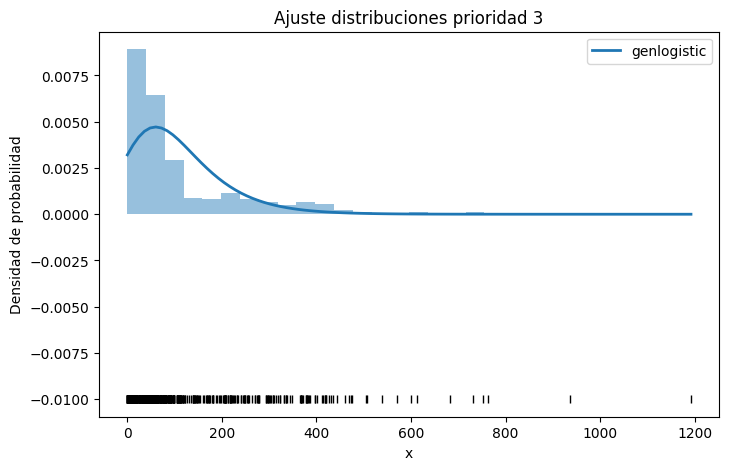

In [32]:
fig, ax = plt.subplots(figsize=(8,5))

plot_multiple_distribuciones(
    x=df3.to_numpy(),
    nombre_distribuciones=resultados['distribucion'][15:16],
    ax=ax
);

((array([-4.15921262, -3.95195275, -3.83889752, ...,  3.83889752,
          3.95195275,  4.15921262]),
  array([5.00000000e-02, 8.33333333e-02, 8.33333333e-02, ...,
         9.35866667e+02, 1.01851667e+03, 1.19200000e+03])),
 (33.21366025727537, 59.24796321892036, 0.8041169096655008))

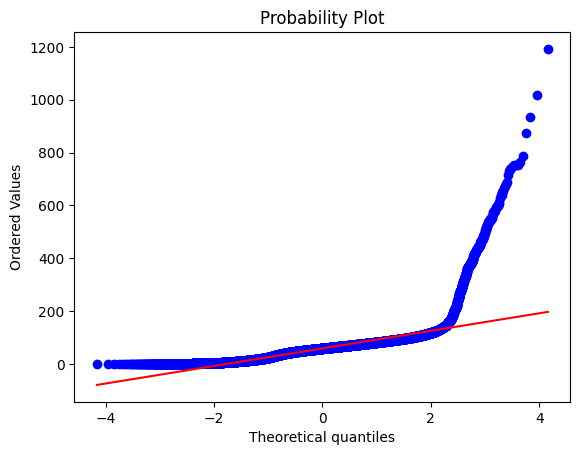

In [33]:
stats.probplot(df['D2'], plot=plt)

https://www.cienciadedatos.net/documentos/pystats01-ajuste-distribuciones-python.html
